# Organización, limpieza y definición de los sets de datos

## Carga y forma de datos

In [1]:
import pandas as pd

# Read the data from the file into a dataframe
df = pd.read_csv('data.txt')

C:\Users\57313\AppData\Local\Temp\ipykernel_5572\3611794660.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Tamaño de los datos y método "head"

In [2]:
# Display the dataframe
print(df.shape)
df.head()

(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Se tienen datos con 15 columnas y un total de 1197 sets da datos

In [3]:
column_types = df.dtypes
print(column_types)


date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


Se observa una consistencia en los datos y sus unidades

## Limpieza y descripción de datos

En el siguiente código limpiamos datos de 'department' para definir correctamente los 2 departamentos y eliminamos las fechas, pues no serán de interés en la investigación.

In [4]:
df=df.drop('date',axis=1)
df['department'] = df['department'].str.replace(' ', '')

In [5]:
data_dict={}
for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")


data_dict = {}

data_dict['targeted_productivity'] = [df['targeted_productivity'].describe()['min'], df['targeted_productivity'].describe()['mean'], df['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df['smv'].describe()['min'], df['smv'].describe()['mean'], df['smv'].describe()['max']]
data_dict['wip'] = [df['wip'].describe()['min'], df['wip'].describe()['mean'], df['wip'].describe()['max']]
data_dict['over_time'] = [df['over_time'].describe()['min'], df['over_time'].describe()['mean'], df['over_time'].describe()['max']]
data_dict['incentive'] = [df['incentive'].describe()['min'], df['incentive'].describe()['mean'], df['incentive'].describe()['max']]
data_dict['idle_time'] = [df['idle_time'].describe()['min'], df['idle_time'].describe()['mean'], df['idle_time'].describe()['max']]
data_dict['idle_men'] = [df['idle_men'].describe()['min'], df['idle_men'].describe()['mean'], df['idle_men'].describe()['max']]
data_dict['no_of_style_change'] = [df['no_of_style_change'].describe()['min'], df['no_of_style_change'].describe()['mean'], df['no_of_style_change'].describe()['max']]
data_dict['no_of_workers'] = [df['no_of_workers'].describe()['min'], df['no_of_workers'].describe()['mean'], df['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df['actual_productivity'].describe()['min'], df['actual_productivity'].describe()['mean'], df['actual_productivity'].describe()['max']]

| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.07   | 0.7296324143692565 | 0.8     |
| smv                 | 2.9    | 15.062172096908938 | 54.56   |
| wip                 | 7.0    | 1190.4659913169319| 23122.0 |
| over_time           | 0.0    | 4567.460317460317 | 25920.0 |
| incentive           | 0.0    | 38.21052631578947 | 3600.0  |
| idle_time           | 0.0    | 0.7301587301587301| 300.0   |
| idle_men            | 0.0    | 0.3692564745196324| 45.0    |
| no_of_style_change  | 0.0    | 0.15037593984962405| 2.0     |
| no_of_workers       | 2.0    | 34.60985797827903 | 89.0    |
| actual_productivity | 0.233705476 | 0.7350910969791145 | 1.1204375 |


Datos únicos de las variables tipo Object

In [6]:
unique_data_dict={}
unique_data_dict['team'] = sorted(df['team'].unique().tolist())

for column in df.columns:
    if df[column].dtype == 'object':
        unique_data_dict[column] = df[column].unique().tolist()
unique_data_dict


{'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['sweing', 'finishing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']}

### Datos separados por departamento

Eliminamos los datos de las fechas para obtener un nuevo dataframe sin esta columna

Separamos los datos en dos DataFrames diferentes para poder trabajar sobre ellos correctamente. Se separarán de acuerdo a los dos departamentos que hay 'sweing' y 'finishing'. Lo anterior, para objetivos del estudio. También, se eliminarán 

In [7]:
df_sweing = df[df['department'] == 'sweing']
df_finishing = df[df['department'] == 'finishing']
df_finishing = df_finishing.drop(['wip','idle_men','idle_time','no_of_style_change','department'], axis=1)
df_sweing = df_sweing .drop(['department'], axis=1)
print(df_sweing.shape)
print(df_finishing.shape)
df_finishing

(691, 13)
(506, 9)


,quarter,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
1,Quarter1,Thursday,1,0.75,3.94,960,0,8.0,0.886500
6,Quarter1,Thursday,2,0.75,3.94,960,0,8.0,0.755167
13,Quarter1,Thursday,10,0.65,3.94,960,0,8.0,0.705917
14,Quarter1,Thursday,8,0.75,2.90,960,0,8.0,0.676667
15,Quarter1,Thursday,4,0.75,3.94,2160,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...
1192,Quarter2,Wednesday,10,0.75,2.90,960,0,8.0,0.628333
1193,Quarter2,Wednesday,8,0.70,3.90,960,0,8.0,0.625625
1194,Quarter2,Wednesday,7,0.65,3.90,960,0,8.0,0.625625
1195,Quarter2,Wednesday,9,0.75,2.90,1800,0,15.0,0.505889


Se analizaran cada uno de estos Dataframes separados.

#### DataFrame Sweing

In [8]:
data_dict = {}

data_dict['targeted_productivity'] = [df_sweing['targeted_productivity'].describe()['min'], df_sweing['targeted_productivity'].describe()['mean'], df_sweing['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df_sweing['smv'].describe()['min'], df_sweing['smv'].describe()['mean'], df_sweing['smv'].describe()['max']]
data_dict['wip'] = [df_sweing['wip'].describe()['min'], df_sweing['wip'].describe()['mean'], df_sweing['wip'].describe()['max']]
data_dict['over_time'] = [df_sweing['over_time'].describe()['min'], df_sweing['over_time'].describe()['mean'], df_sweing['over_time'].describe()['max']]
data_dict['incentive'] = [df_sweing['incentive'].describe()['min'], df_sweing['incentive'].describe()['mean'], df_sweing['incentive'].describe()['max']]
data_dict['idle_time'] = [df_sweing['idle_time'].describe()['min'], df_sweing['idle_time'].describe()['mean'], df_sweing['idle_time'].describe()['max']]
data_dict['idle_men'] = [df_sweing['idle_men'].describe()['min'], df_sweing['idle_men'].describe()['mean'], df_sweing['idle_men'].describe()['max']]
data_dict['no_of_style_change'] = [df_sweing['no_of_style_change'].describe()['min'], df_sweing['no_of_style_change'].describe()['mean'], df_sweing['no_of_style_change'].describe()['max']]
data_dict['no_of_workers'] = [df_sweing['no_of_workers'].describe()['min'], df_sweing['no_of_workers'].describe()['mean'], df_sweing['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df_sweing['actual_productivity'].describe()['min'], df_sweing['actual_productivity'].describe()['mean'], df_sweing['actual_productivity'].describe()['max']]


for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")

targeted_productivity:
   Mínimo: 0.07
   Promedio: 0.7239797395079595
   Máximo: 0.8
smv:
   Mínimo: 10.05
   Promedio: 23.245412445730825
   Máximo: 54.56
wip:
   Mínimo: 7.0
   Promedio: 1190.4659913169319
   Máximo: 23122.0
over_time:
   Mínimo: 0.0
   Promedio: 6508.205499276411
   Máximo: 25920.0
incentive:
   Mínimo: 0.0
   Promedio: 44.483357452966715
   Máximo: 138.0
idle_time:
   Mínimo: 0.0
   Promedio: 1.264833574529667
   Máximo: 300.0
idle_men:
   Mínimo: 0.0
   Promedio: 0.6396526772793053
   Máximo: 45.0
no_of_style_change:
   Mínimo: 0.0
   Promedio: 0.26049204052098407
   Máximo: 2.0
no_of_workers:
   Mínimo: 26.0
   Promedio: 52.44573082489146
   Máximo: 89.0
actual_productivity:
   Mínimo: 0.233705476
   Promedio: 0.7220130317105644
   Máximo: 1.100483918


| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.07   | 0.7239797395079595 | 0.8     |
| smv                 | 10.05  | 23.245412445730825 | 54.56   |
| wip                 | 7.0    | 1190.4659913169319| 23122.0 |
| over_time           | 0.0    | 6508.205499276411 | 25920.0 |
| incentive           | 0.0    | 44.483357452966715 | 138.0   |
| idle_time           | 0.0    | 1.264833574529667 | 300.0   |
| idle_men            | 0.0    | 0.6396526772793053| 45.0    |
| no_of_style_change  | 0.0    | 0.26049204052098407| 2.0     |
| no_of_workers       | 26.0   | 52.44573082489146 | 89.0    |
| actual_productivity | 0.233705476 | 0.7220130317105644 | 1.100483918 |


In [10]:
unique_data_dict['team'] = sorted(df_sweing['team'].unique().tolist())

for column in df_sweing.columns:
    if df_sweing[column].dtype == 'object':
        unique_data_dict[column] = df_sweing[column].unique().tolist()
unique_data_dict
#final

{'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['sweing', 'finishing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']}

#### Data Finishing

In [12]:

data_dict = {}
data_dict['targeted_productivity'] = [df_finishing['targeted_productivity'].describe()['min'], df_finishing['targeted_productivity'].describe()['mean'], df_finishing['targeted_productivity'].describe()['max']]
data_dict['smv'] = [df_finishing['smv'].describe()['min'], df_finishing['smv'].describe()['mean'], df_finishing['smv'].describe()['max']]
data_dict['over_time'] = [df_finishing['over_time'].describe()['min'], df_finishing['over_time'].describe()['mean'], df_finishing['over_time'].describe()['max']]
data_dict['incentive'] = [df_finishing['incentive'].describe()['min'], df_finishing['incentive'].describe()['mean'], df_finishing['incentive'].describe()['max']]
data_dict['no_of_workers'] = [df_finishing['no_of_workers'].describe()['min'], df_finishing['no_of_workers'].describe()['mean'], df_finishing['no_of_workers'].describe()['max']]
data_dict['actual_productivity'] = [df_finishing['actual_productivity'].describe()['min'], df_finishing['actual_productivity'].describe()['mean'], df_finishing['actual_productivity'].describe()['max']]

for column, values in data_dict.items():
    print(f"{column}:")
    print(f"   Mínimo: {values[0]}")
    print(f"   Promedio: {values[1]}")
    print(f"   Máximo: {values[2]}")

targeted_productivity:
   Mínimo: 0.35
   Promedio: 0.7373517786561267
   Máximo: 0.8
smv:
   Mínimo: 2.9
   Promedio: 3.887035573122529
   Máximo: 5.13
over_time:
   Mínimo: 0.0
   Promedio: 1917.1541501976285
   Máximo: 15000.0
incentive:
   Mínimo: 0.0
   Promedio: 29.64426877470356
   Máximo: 3600.0
no_of_workers:
   Mínimo: 2.0
   Promedio: 10.25296442687747
   Máximo: 28.0
actual_productivity:
   Mínimo: 0.235795455
   Promedio: 0.7529506683241106
   Máximo: 1.1204375


| Variable            | Mínimo | Promedio          | Máximo  |
|---------------------|--------|-------------------|---------|
| targeted_productivity | 0.35   | 0.7373517786561267 | 0.8     |
| smv                 | 2.9    | 3.887035573122529  | 5.13    |
| over_time           | 0.0    | 1917.1541501976285 | 15000.0 |
| incentive           | 0.0    | 29.64426877470356  | 3600.0  |
| no_of_workers       | 2.0    | 10.25296442687747  | 28.0    |
| actual_productivity | 0.235795455 | 0.7529506683241106 | 1.1204375 |


In [14]:
unique_data_dict['team'] = sorted(df_finishing['team'].unique().tolist())

for column in df_finishing.columns:
    if df_finishing[column].dtype == 'object':
        unique_data_dict[column] = df_finishing[column].unique().tolist()
unique_data_dict

{'team': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'quarter': ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
 'department': ['sweing', 'finishing'],
 'day': ['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']}

## Datos atípicos

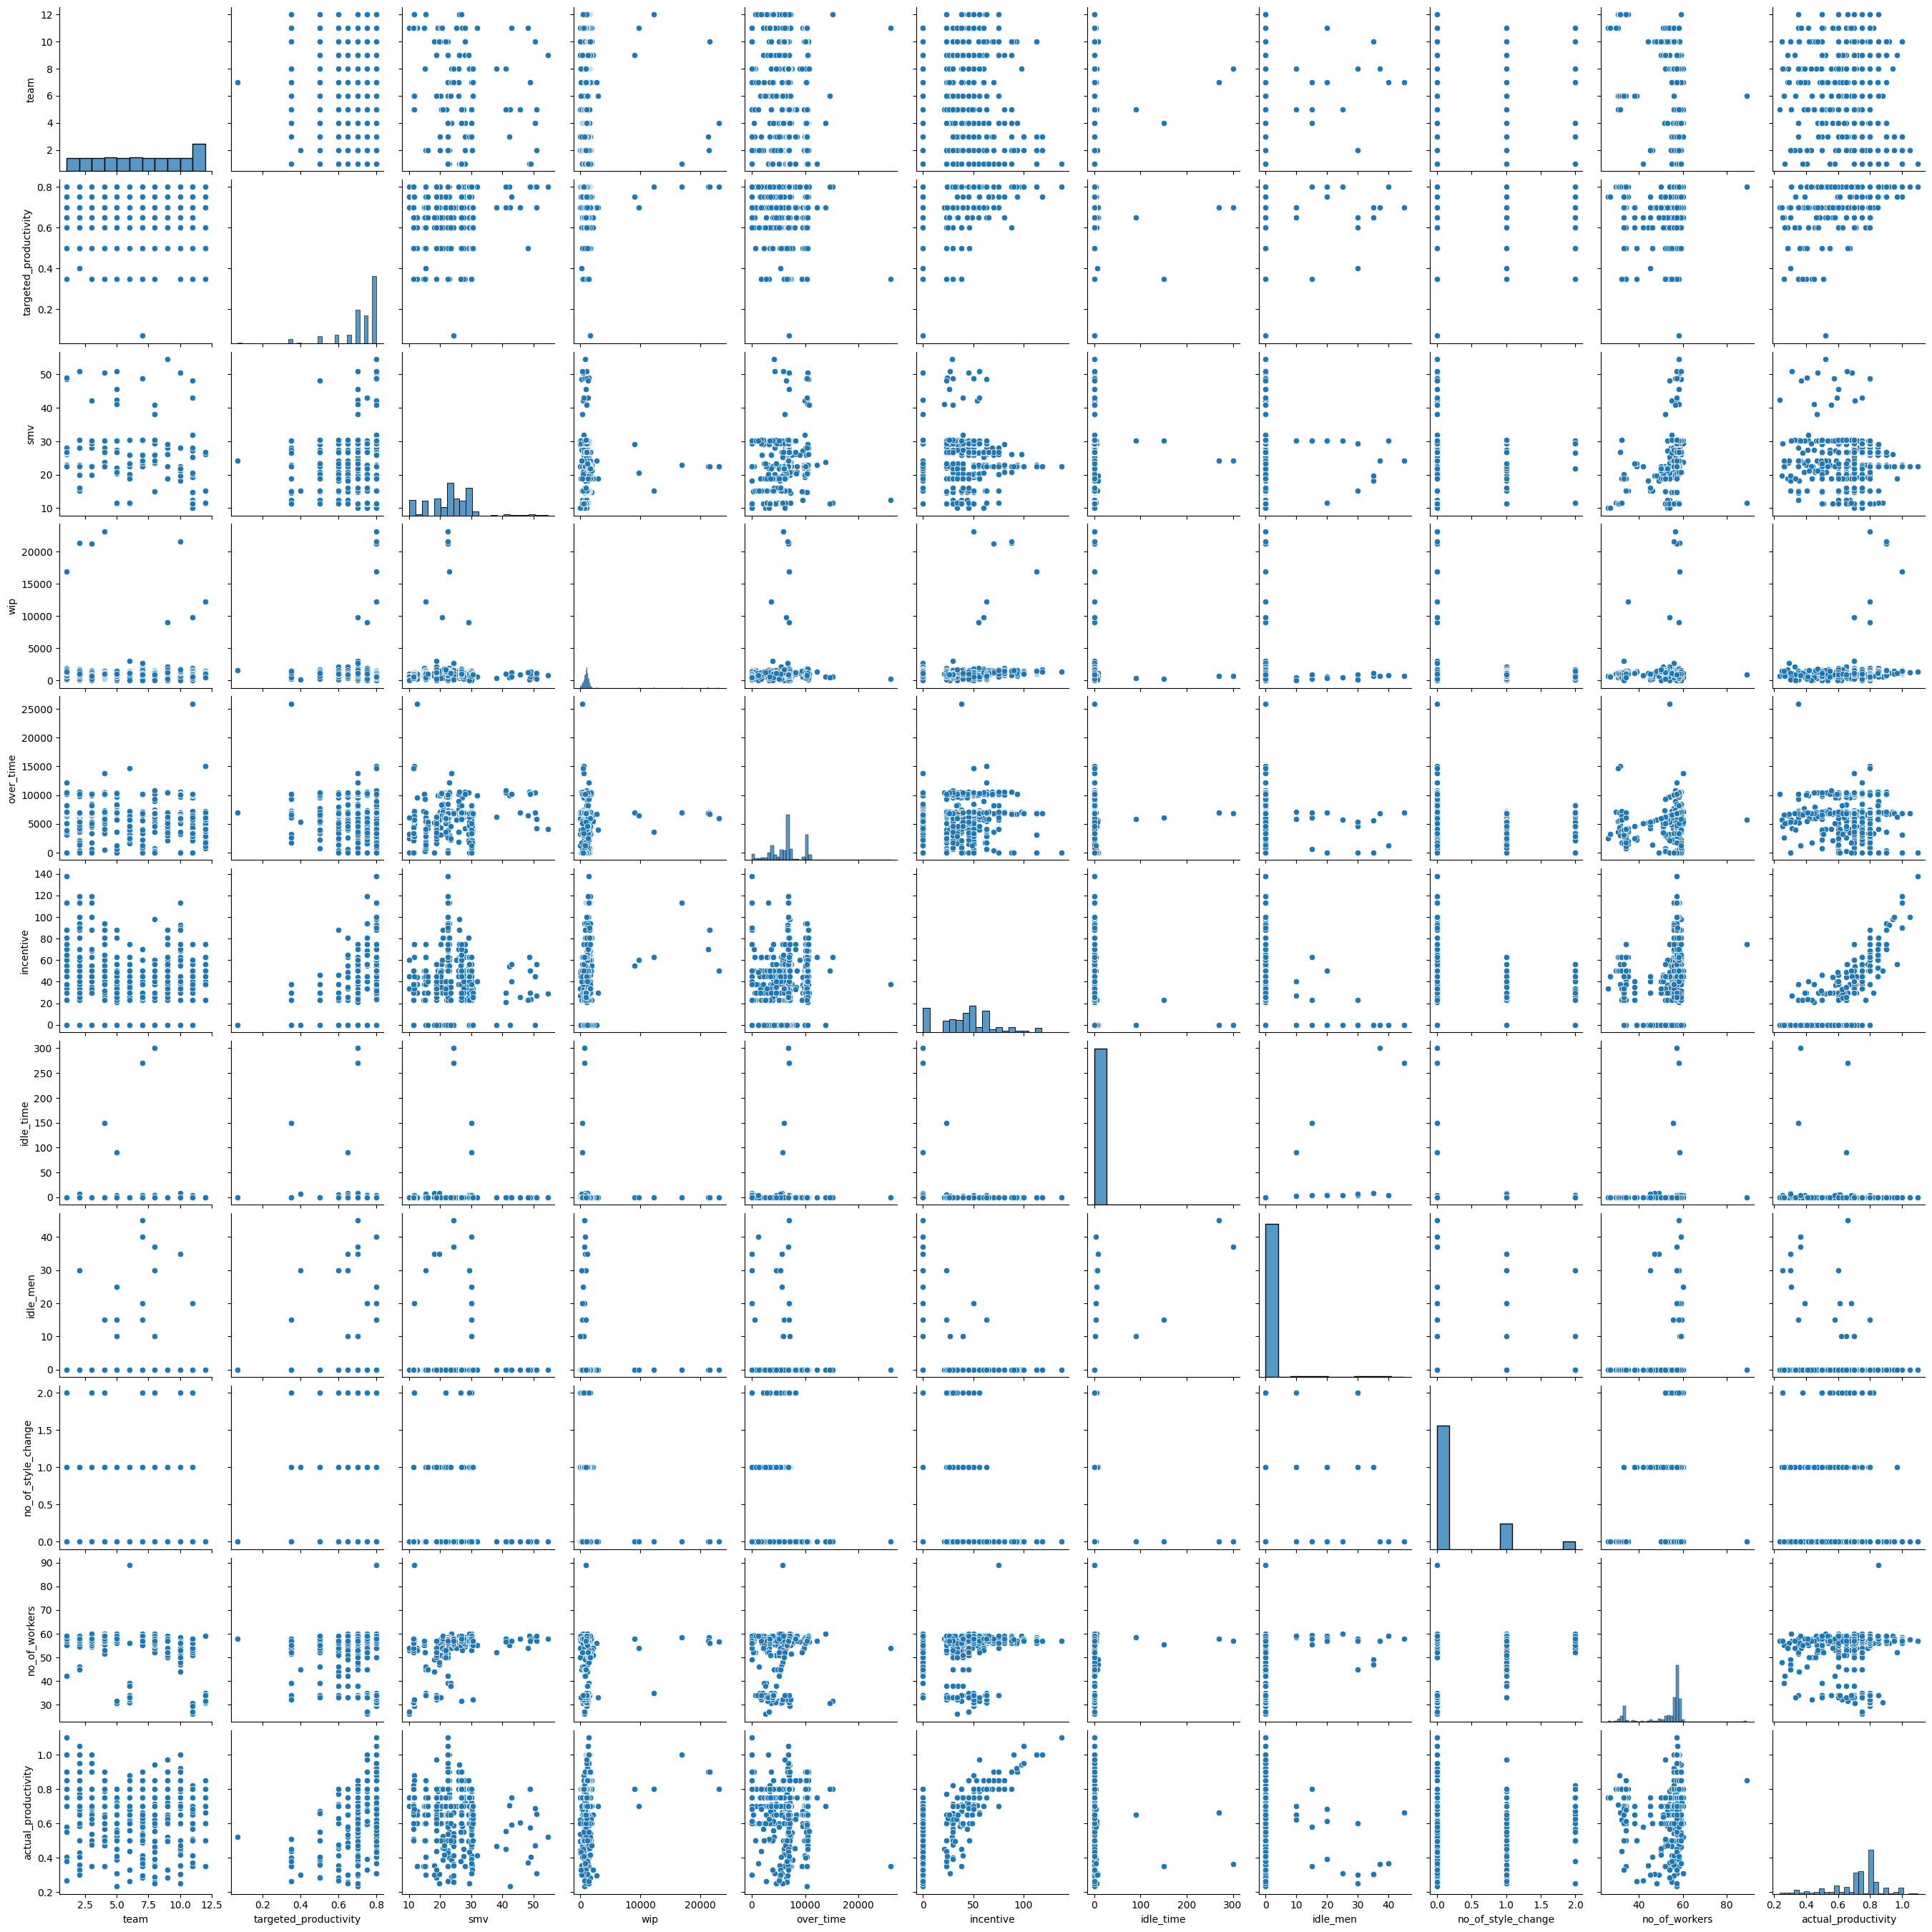

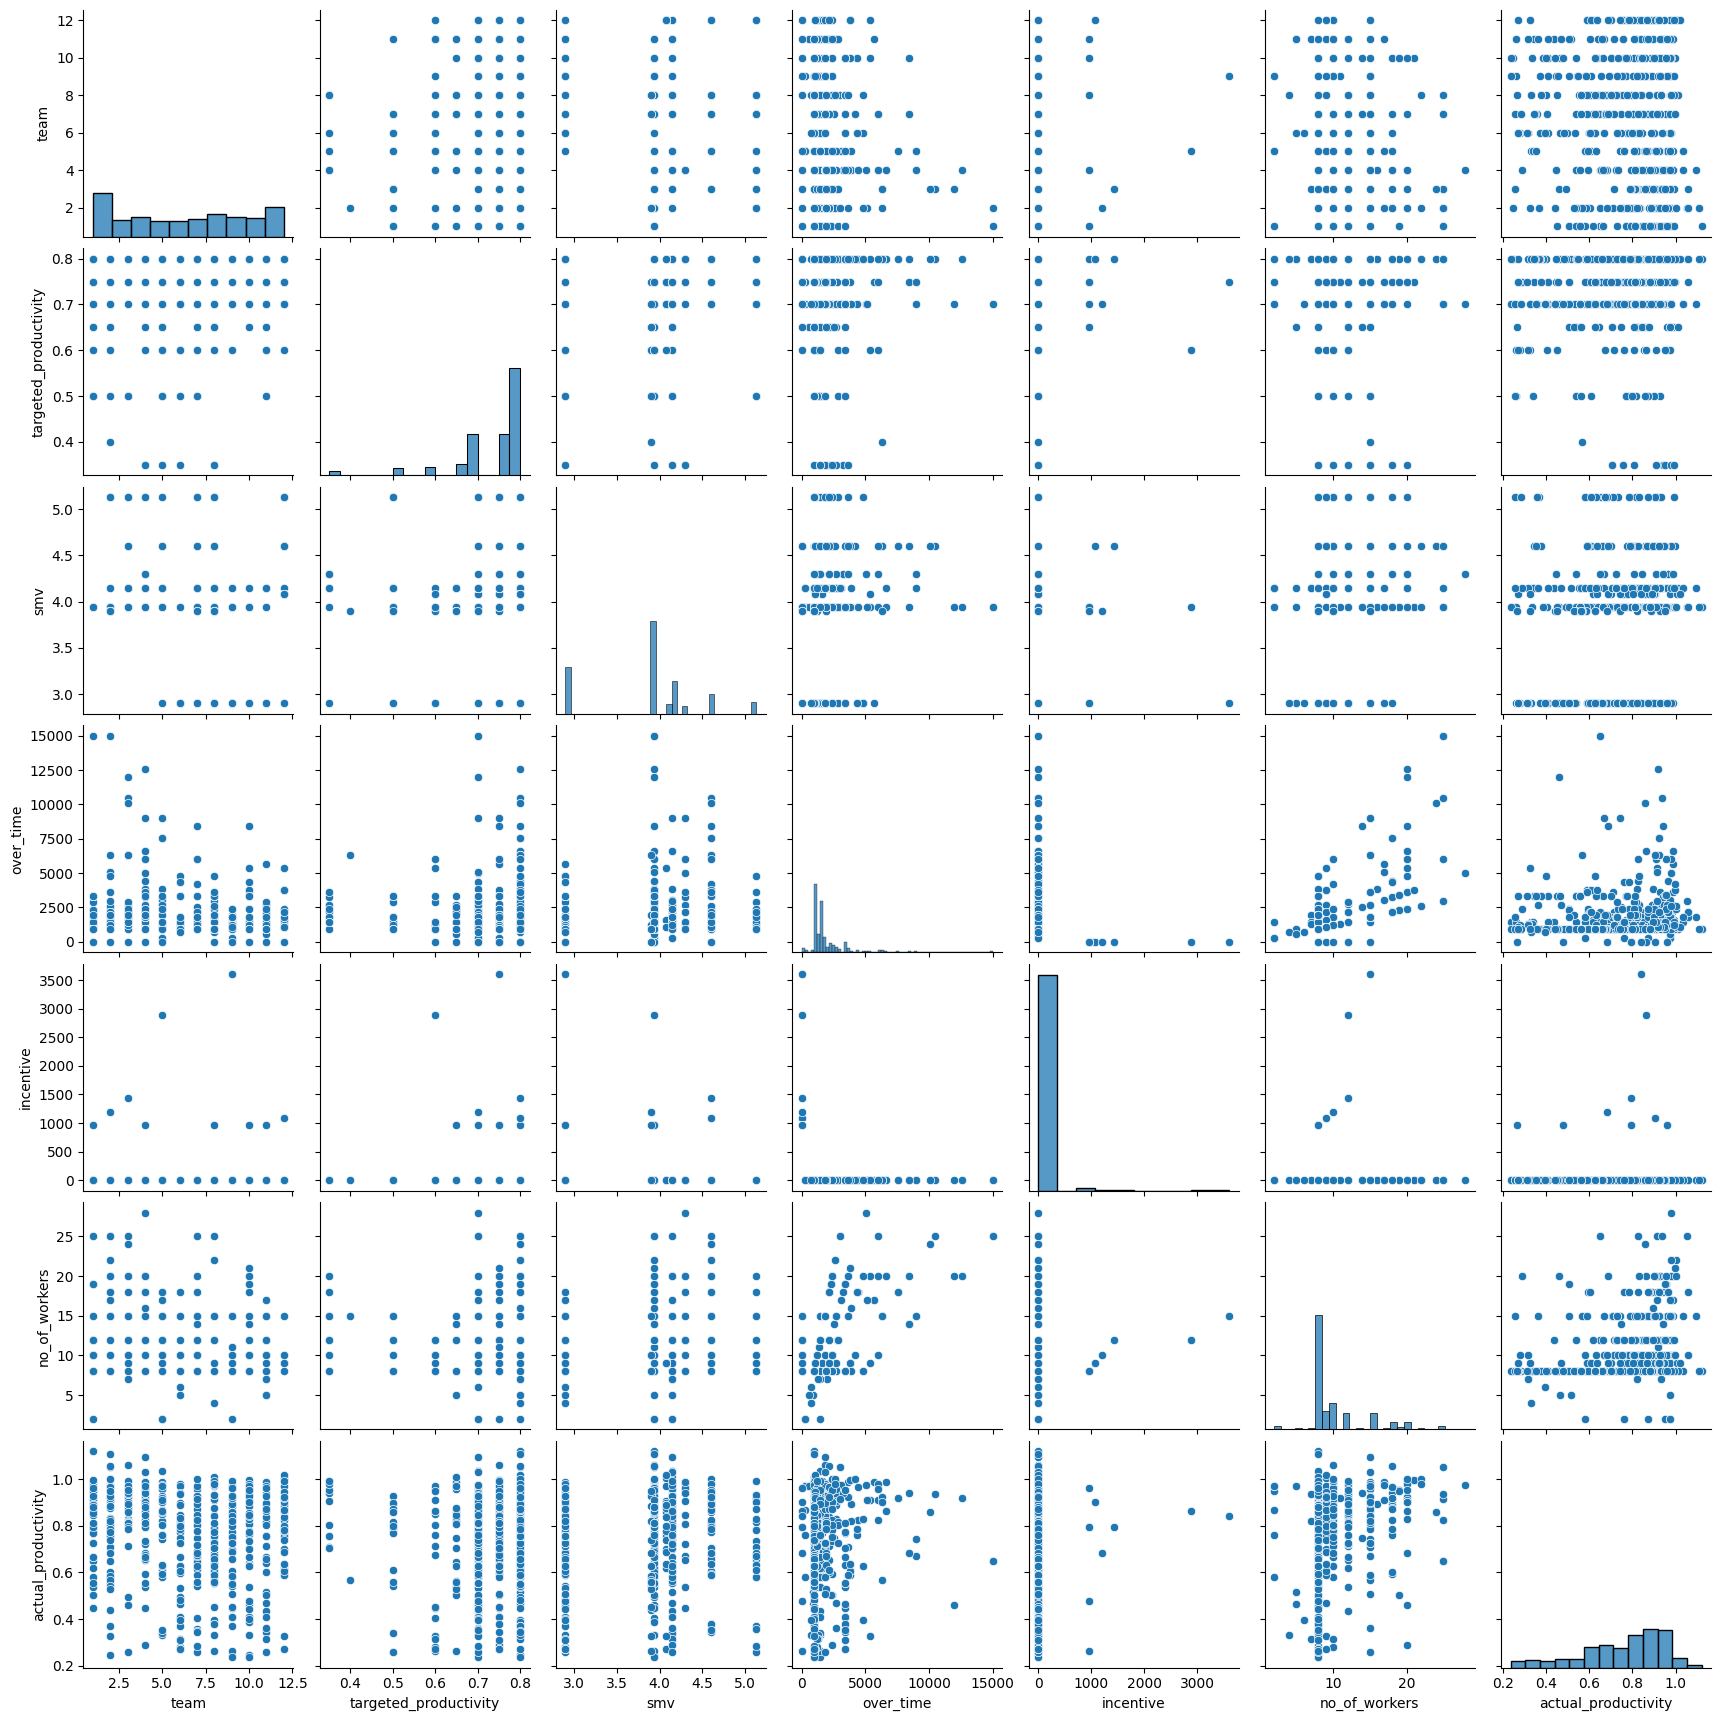

In [16]:
import seaborn as sns
sns.pairplot(df_sweing,)
sns.pairplot(df_finishing,)

### Matriz de correlación

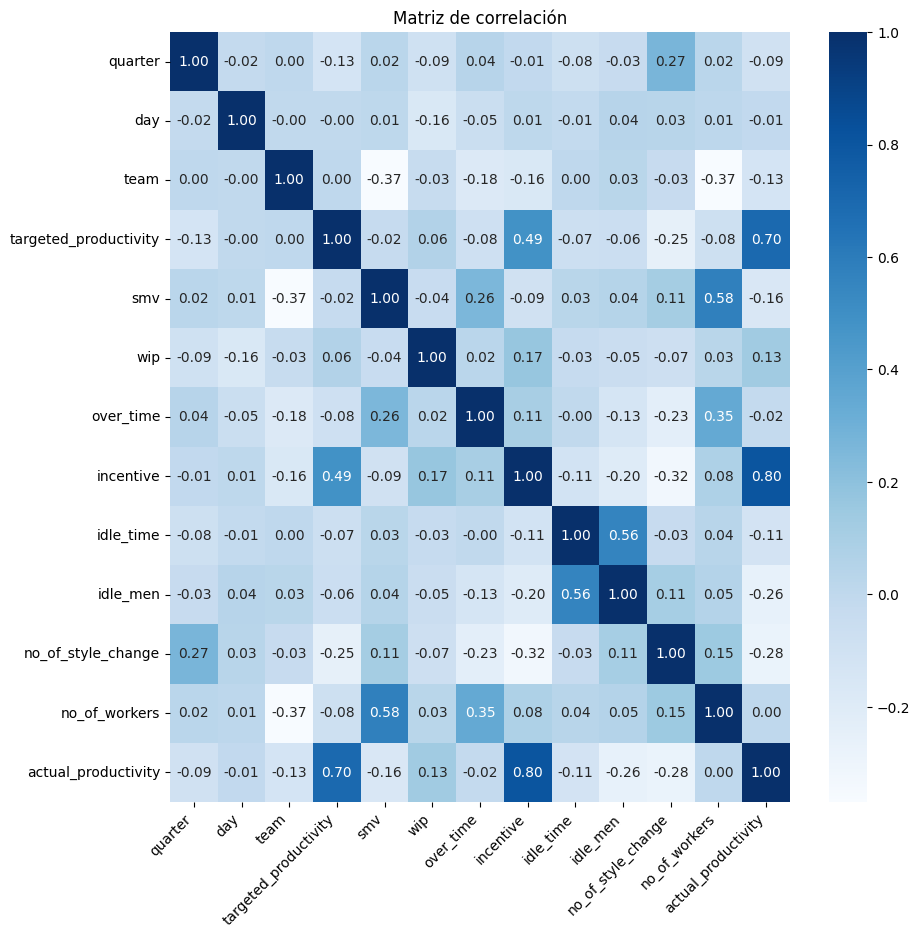

In [81]:
# matriz de correlación para sewing
import matplotlib.pyplot as plt

# Convertir las columnas categóricas a numéricas
for col in df_sweing.columns:
    if df_sweing[col].dtype == 'object':
        df_sweing[col] = df_sweing[col].astype('category').cat.codes

# Ahora puedes calcular la correlación
corr = df_sweing.corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Calcular la correlación
corr = df_sweing.corr()

# Crear un mapa de calor con seaborn
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f", annot_kws={"size": 10})

# Añadir un título
plt.title("Matriz de correlación")

# Rotar las etiquetas del eje x y ajustar su alineación
plt.xticks(rotation=45, ha='right')

# Mostrar la figura
plt.show()

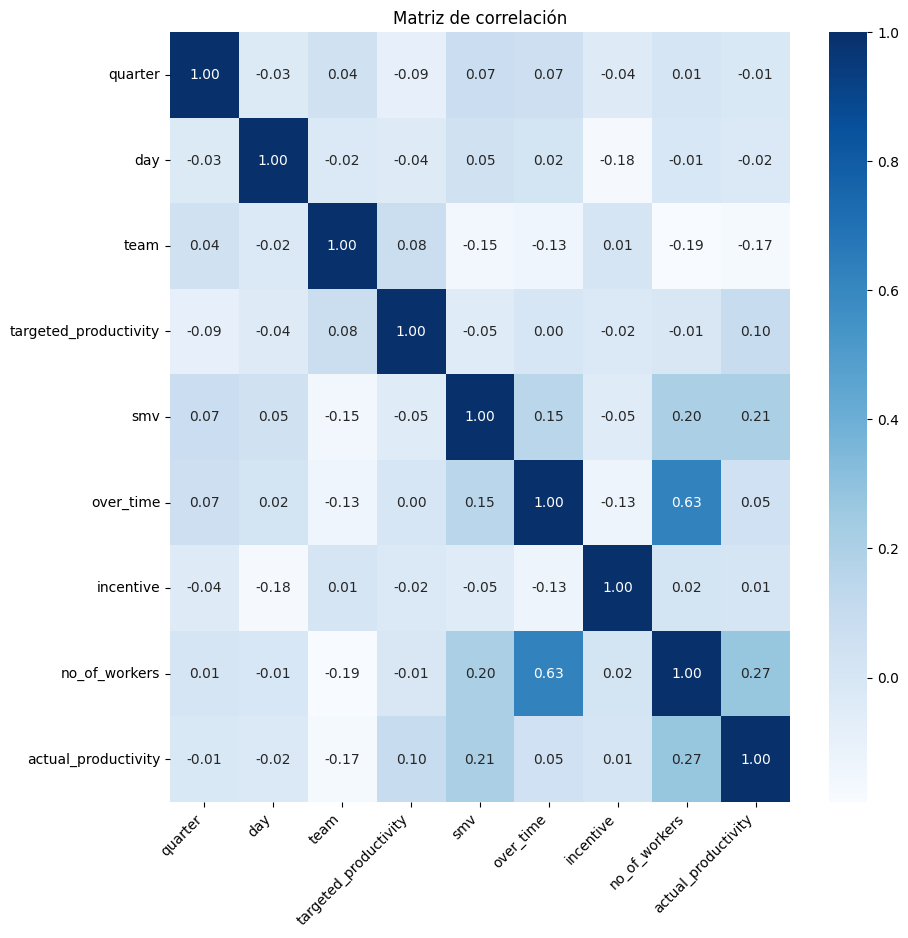

In [82]:
# matriz de correlación  finishing
import matplotlib.pyplot as plt

# Convertir las columnas categóricas a numéricas
for col in df_finishing.columns:
    if df_finishing[col].dtype == 'object':
        df_finishing[col] = df_finishing[col].astype('category').cat.codes

# Ahora puedes calcular la correlación
corr = df_finishing.corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Calcular la correlación
corr = df_finishing.corr()

# Crear un mapa de calor con seaborn
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f", annot_kws={"size": 10})

# Añadir un título
plt.title("Matriz de correlación")

# Rotar las etiquetas del eje x y ajustar su alineación
plt.xticks(rotation=45, ha='right')

# Mostrar la figura
plt.show()

#### Eliminación de datos atipicos

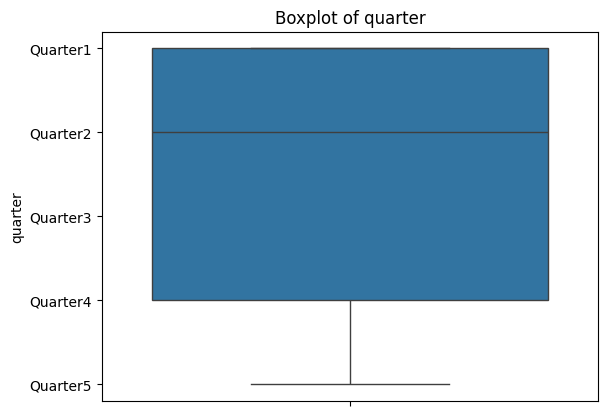

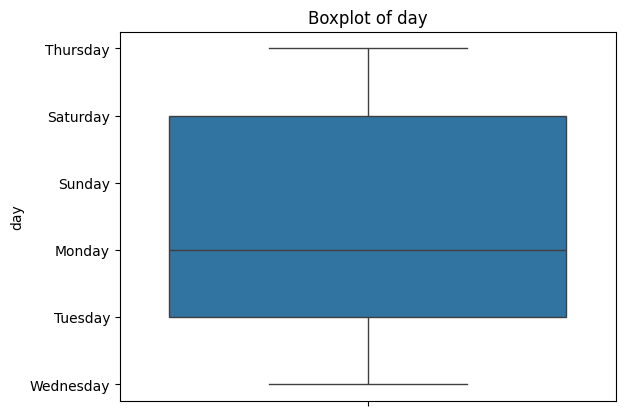

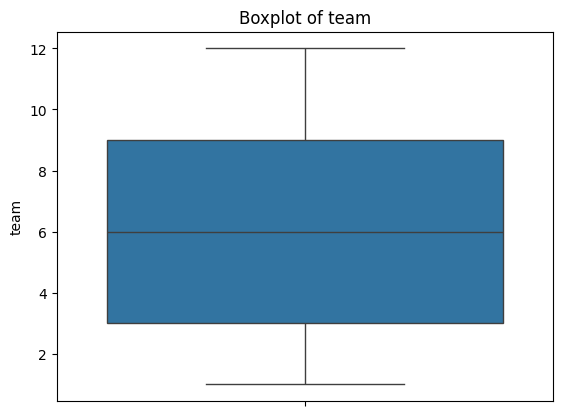

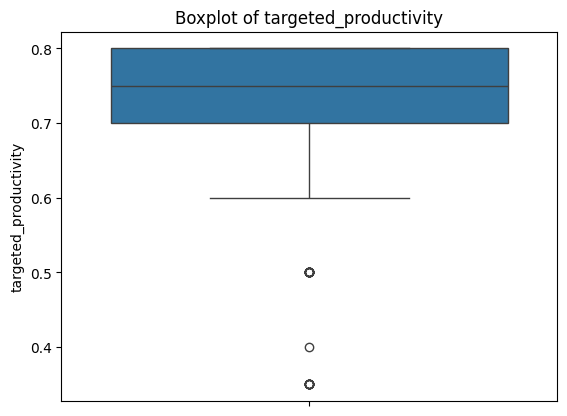

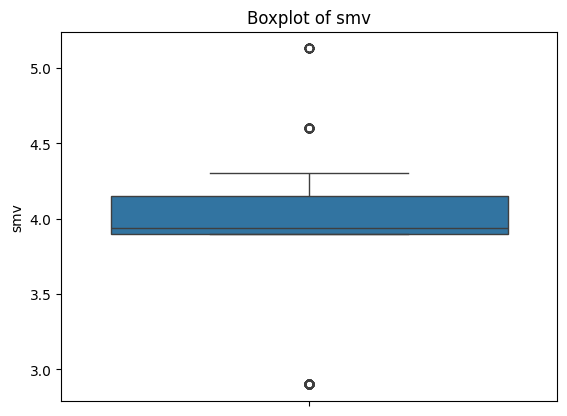

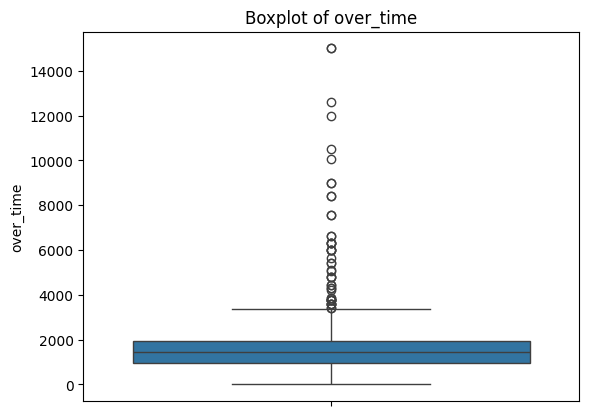

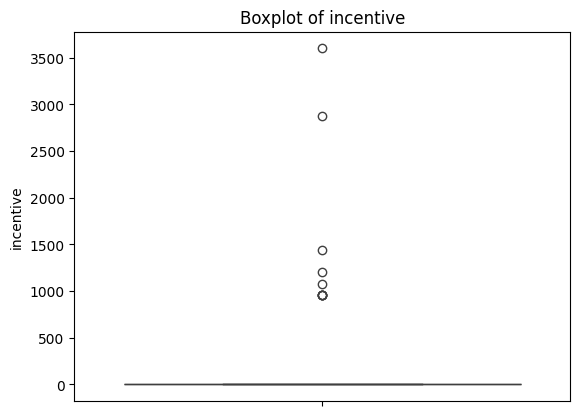

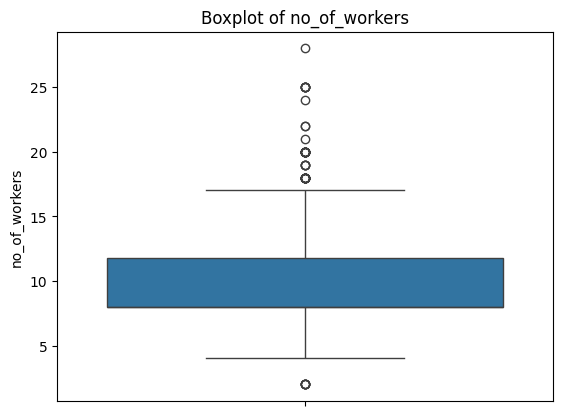

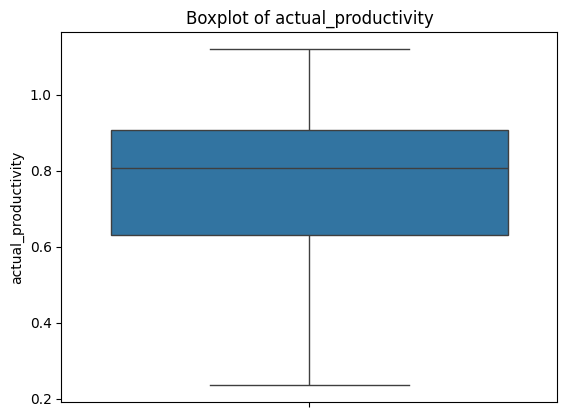

In [17]:
import matplotlib.pyplot as plt

# Obtener la lista de variables
variables = df_finishing.columns.tolist()

# Generar los boxplots de forma independiente
for variable in variables:
    plt.figure()
    sns.boxplot(data=df_finishing[variable])
    plt.title(f"Boxplot of {variable}")
    plt.show()



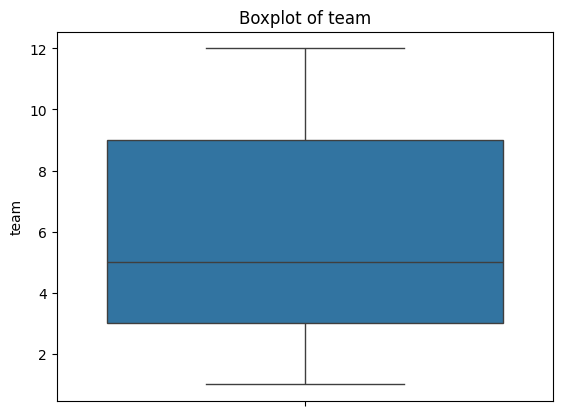

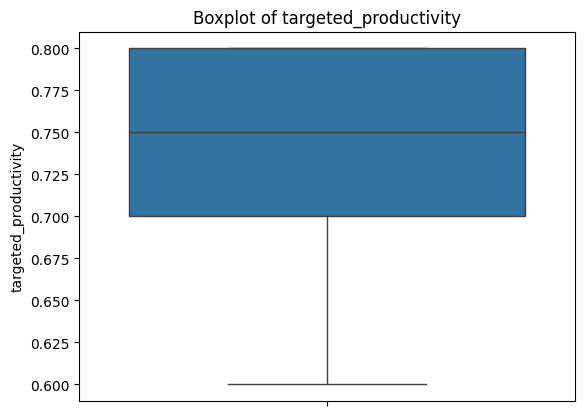

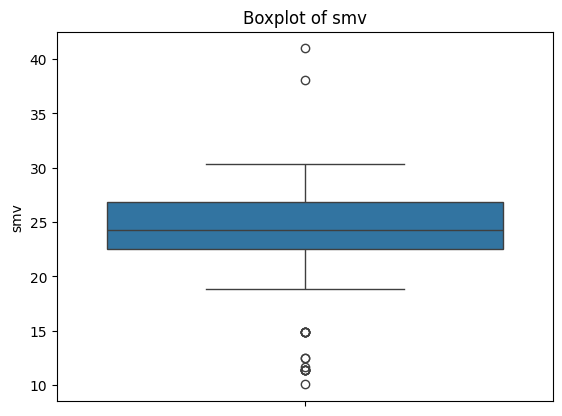

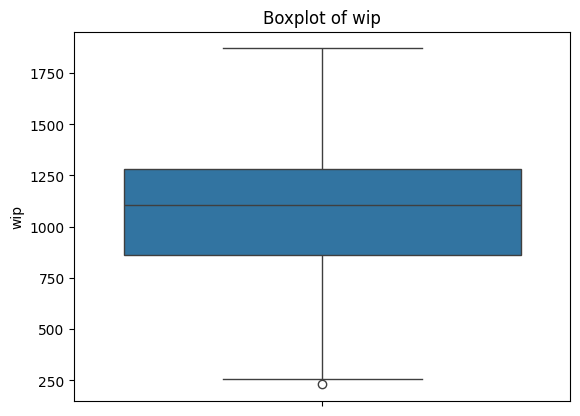

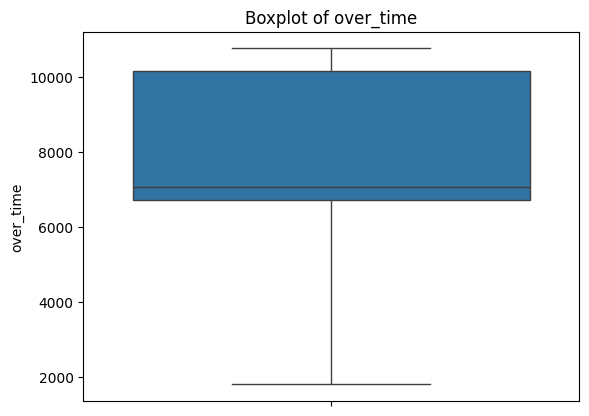

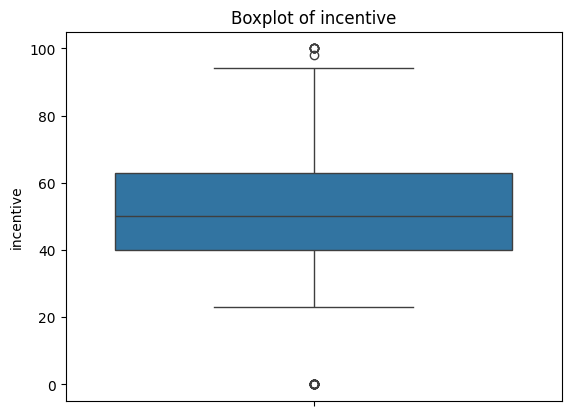

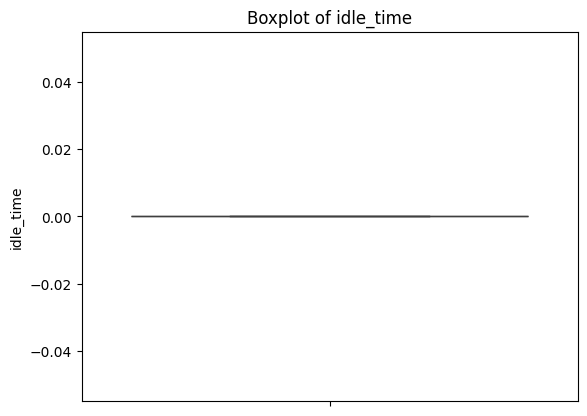

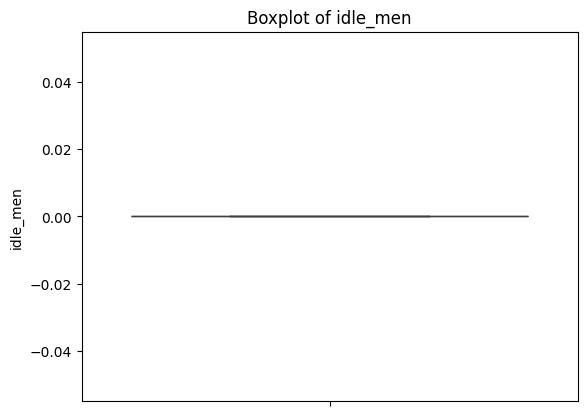

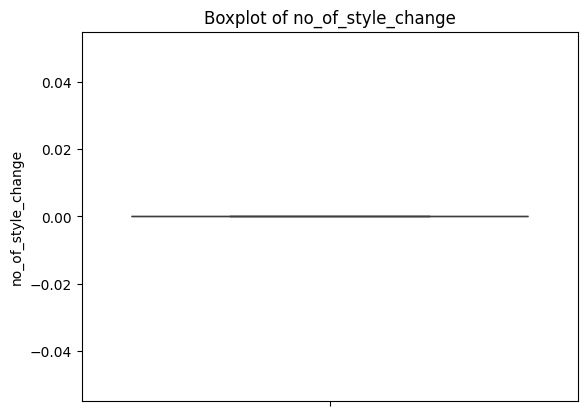

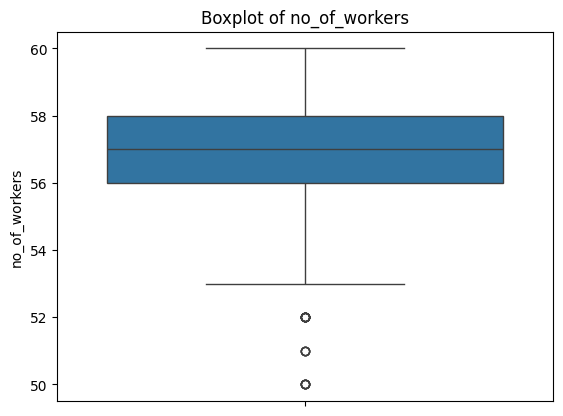

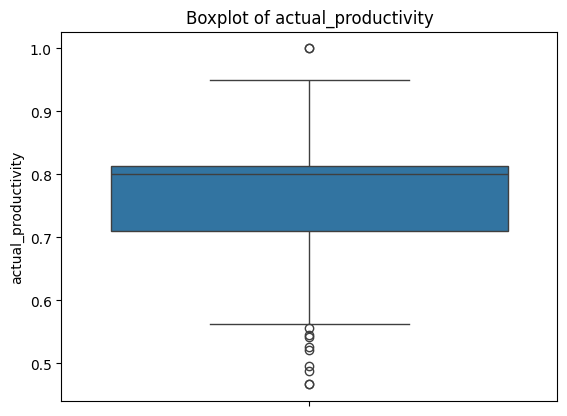

In [19]:
import numpy as np

# Seleccionar solo las columnas numéricas
df_sweing_numeric = df_sweing.select_dtypes(include=[np.number])

# Calcular el rango intercuartílico
Q1 = df_sweing_numeric.quantile(0.25)
Q3 = df_sweing_numeric.quantile(0.75)
IQR = Q3 - Q1

# Crear una máscara para los datos atípicos
mask = ~((df_sweing_numeric < (Q1 - 1.5 * IQR)) | (df_sweing_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# Aplicar la máscara al DataFrame original para eliminar las filas con datos atípicos
df_sweing = df_sweing[mask]

# Generar los boxplots de forma independiente
for variable in df_sweing_numeric.columns:
    plt.figure()
    sns.boxplot(data=df_sweing[variable])
    plt.title(f"Boxplot of {variable}")
    plt.show()


In [85]:
df_sweing.head()

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
4,0,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,0,3,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
7,0,3,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,0,3,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098


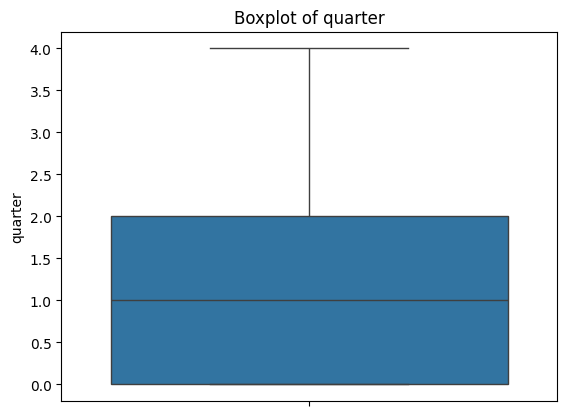

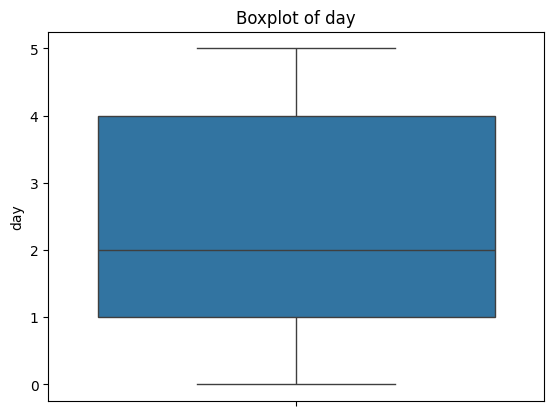

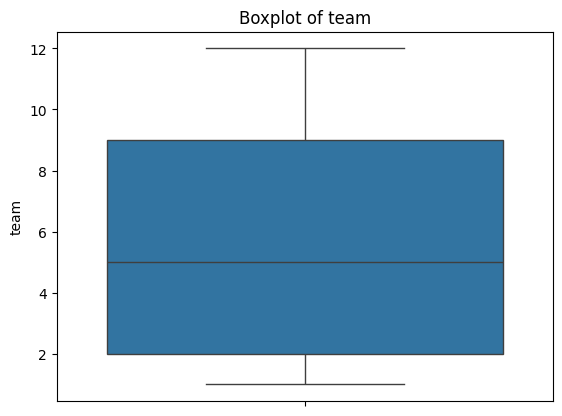

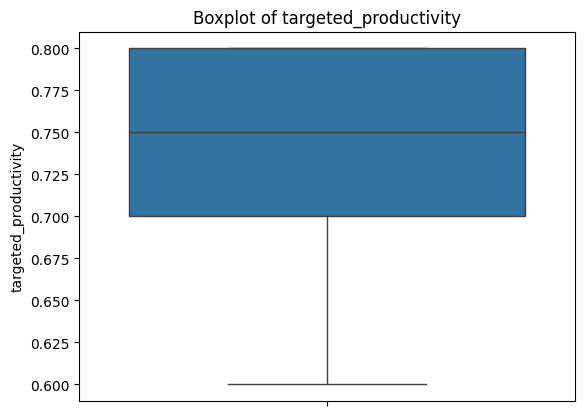

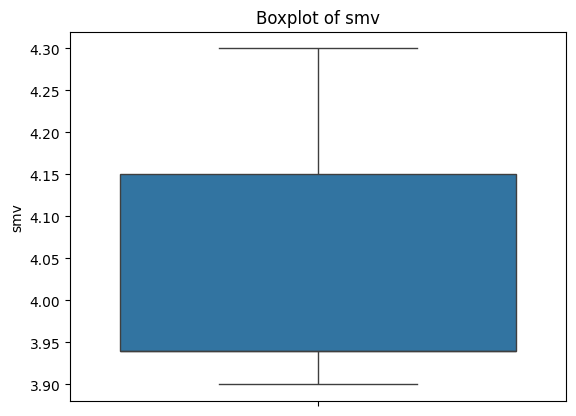

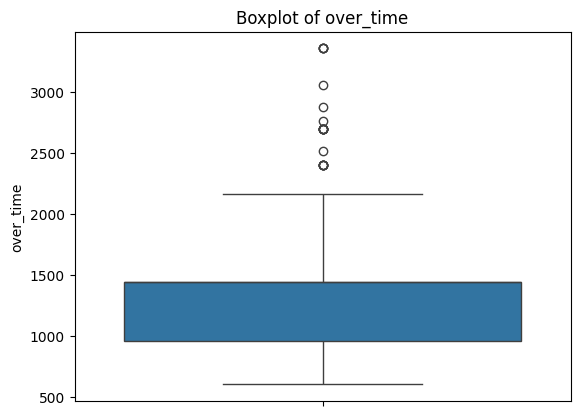

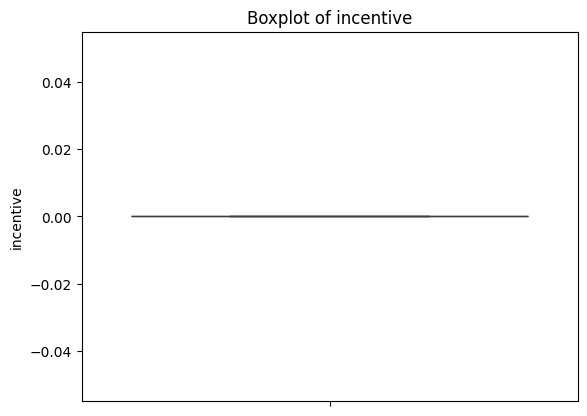

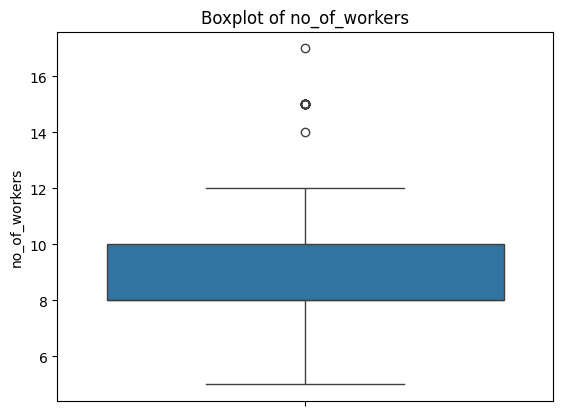

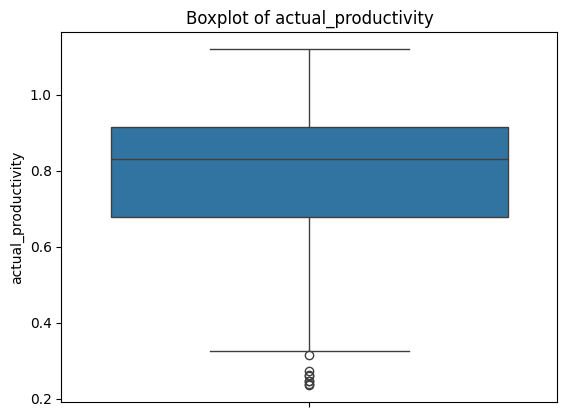

In [61]:
#limpiar datos atipicos de finishing
# Calcular el rango intercuartílico
Q1 = df_finishing.quantile(0.25)
Q3 = df_finishing.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos atípicos
df_finishing = df_finishing[~((df_finishing < (Q1 - 1.5 * IQR)) | (df_finishing > (Q3 + 1.5 * IQR))).any(axis=1)]

# Generar los boxplots de forma independiente
for variable in variables:
    plt.figure()
    sns.boxplot(data=df_finishing[variable])
    plt.title(f"Boxplot of {variable}")
    plt.show()

In [20]:
print(df_sweing.columns)

Index(['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')


In [21]:
# añadir columnas de variables dummies de la columna quarter y day
df_sweing = pd.get_dummies(df_sweing, columns=['quarter', 'day'])


#### Modelo de regresión

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Dividir los datos en variables dependientes e independientes
X = df_sweing.drop('actual_productivity', axis=1)
y = df_sweing['actual_productivity']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación: {r2}")

# coeficientes con nombre de las características
coefs = pd.DataFrame(model.coef_, index=X.columns, columns=['Coeficiente'])
coefs


Error cuadrático medio: 0.0017151015204339005
Coeficiente de determinación: 0.7552602479469497


,Coeficiente
team,-1.767169e-03
targeted_productivity,7.515825e-01
smv,-8.260439e-04
wip,1.512060e-05
over_time,-1.050188e-06
incentive,2.333299e-03
idle_time,6.938894e-16
idle_men,-1.942890e-16
no_of_style_change,5.551115e-17
no_of_workers,1.536141e-03


In [28]:
# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.837
Model:                             OLS   Adj. R-squared:                  0.833
Method:                  Least Squares   F-statistic:                     226.1
Date:                 Sat, 09 Mar 2024   Prob (F-statistic):          2.48e-117
Time:                         11:45:09   Log-Likelihood:                 599.90
No. Observations:                  316   AIC:                            -1184.
Df Residuals:                      308   BIC:                            -1154.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

c:\Users\57313\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Codifica las variables categóricas con one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Asegúrate de que X_encoded solo contenga columnas numéricas
X_encoded = X_encoded.select_dtypes(include=[np.number])

# Añade una columna constante al DataFrame X_encoded
X_encoded = sm.add_constant(X_encoded)

# Ajusta el modelo de regresión lineal
model = sm.OLS(y, X_encoded).fit()

# Realiza la prueba de significancia global del modelo
model_f_test = model.f_test(np.eye(len(X_encoded.columns)))

# Realiza la prueba de significancia individual de cada variable
variable_t_test = model.t_test(np.eye(len(X_encoded.columns)))

# Imprime los resultados
print("Prueba de Significancia Global (Modelo):")
print(model_f_test)

print("\nPrueba de Significancia Individual (Variables):")
print(variable_t_test)

Prueba de Significancia Global (Modelo):
<F test: F=17687.434349321637, p=0.0, df_denom=308, df_num=8>

Prueba de Significancia Individual (Variables):
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0831      0.072      1.147      0.252      -0.059       0.226
c1            -0.0021      0.001     -3.017      0.003      -0.003      -0.001
c2             0.7037      0.042     16.789      0.000       0.621       0.786
c3            -0.0007      0.001     -1.274      0.204      -0.002       0.000
c4          1.619e-05   6.75e-06      2.400      0.017    2.92e-06    2.95e-05
c5         -2.405e-06   1.01e-06     -2.370      0.018    -4.4e-06   -4.08e-07
c6             0.0024      0.000     20.666      0.000       0.002       0.003
c7                  0          0          0      1.000    

c:\Users\57313\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [23]:
import statsmodels.api as sm

# Add a constant column to the X dataframe
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Perform the overall significance test of the model
model_f_test = model.f_test(np.eye(len(X.columns)))

# Perform the individual significance test of each variable
variable_t_test = model.t_test(np.eye(len(X.columns)))

# Print the results
print("Overall Significance Test (Model):")
print(model_f_test)

print("\nIndividual Significance Test (Variables):")
print(variable_t_test)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).